## Цель работы: просчитать и рассмотреть распределение уволенных сотрудников у каждого регионального лидера (РЛ) и супервайзера (СВ).

#Для решения данной цели были поставлены следующие задачи:
1. Создание единой базы данных (Excel), куда будут вносится все акутальные данные по зарплатным ведомостям (предварительно проверенных).
2. Рассчитать стаж работы каждого сотрудника (актуальная дата ведомости - дата создания карточки сотрудника в корпоративном приложении):
  - рассмотреть распределение сотрудников по стажу;
  - рассчитать средний стаж уволенных сотрудников;
  - узнать средний стаж сотрудника у РЛ;
  - рассчитать средний срок жизни сотрудника.
3. Распредилить сотрудников по стажевой группе "Менее 0", "1-3", "4-6", "6-12", "Более 12":
  - рассмотреть распределение сотрудников по стажевой группе;
  - какая стажевая группа увольняется в большинстве случаев;
  - узнать какая стажевая группа приобладает у РЛ;
4. Распределить все данные в рассчете по РЛ; по РЛ, Региону и Городу; по РЛ, СВ. Здесь необходимо указать сколько всего штат сотрудников у РЛ и СВ и количество уволенных МЧ, процент текучести кадров. Так же, необходимо понимать, в каком городе большая текучесть и как часто в городе происходит увольнение сотрудников.
5. Сбор обратной связи от региональных лидеров по уволенным сотрудникам (Excel), а именно: уволила компания за нарушения и пр., либо уволился сам.

###Стоит отметить следующие проблемы, с которыми столкнулись.
В связи с тем, что данные в ведомости имеют многочисленный ошибки (неверно написана фамилия, имя, отчество, 3 идентификатора на 1 сотрудника, 2 супервайзера на 1 мерчендайзера и т.д.), большая часть времени чистки данных происходит вручную (Excel).

После первых полученных и проанализированных данных, региональным лидерам высылается список уволенных сотрудников, где они указывают: сколько отработал данный МЧ, работает ли он на постоянной основе или подменяет в определенный период времени. 

P.S. Необходимо отметить, что база данных (Excel) была создана впервые. До этого никто не вел отчетность по уволенным сотрудникам, времени жизни сотрудника на проекте и т.д.


Подключаем необходимые библиотеки

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [71]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(10,4)},
        )

Подгружаем данные

In [72]:
salary = pd.read_csv('/content/drive/MyDrive/Work/Salary20.04.23.csv', encoding="utf-8", delimiter=';')

In [74]:
salary.columns = [name.replace(' ','_') for name in salary.columns] #переименование столбов для удобства пользования
salary.месяц = pd.to_datetime(salary.месяц, format='%d.%m.%Y') #изменение столба "Месяц" в формат даты
salary.Дата_создания_карточки = pd.to_datetime(salary.Дата_создания_карточки, format='%d.%m.%Y')

Высчитываем стаж работы сотрудника

In [75]:
max_date_for_pers = salary.groupby(['ИД_мрч', 'ФИО_(как_оформлен,_полное)'], as_index=False).agg({'месяц':'max'}).rename(columns={'месяц':'макс_месяц'})

In [76]:
salary = salary.merge(max_date_for_pers, on=['ИД_мрч', 'ФИО_(как_оформлен,_полное)'], how='left')

In [77]:
salary['Стаж_работы'] = abs(round((salary["макс_месяц"] - salary["Дата_создания_карточки"]) / np.timedelta64 ( 1 , 'M'),2))

Распределяем сотрудников по группам "Стаж работы"

In [78]:
work_experience = ["Менее 0", "1-3", "4-6", "6-12", "Более 12"]
cut_experience = [-1, 1, 3, 6, 12, 1000]
salary['Группа по стажу'] = pd.cut(salary.Стаж_работы, bins=cut_experience, labels=work_experience)

In [79]:
work_life = salary[['ИД_мрч', 'Стаж_работы']].drop_duplicates()

Найдем средний срок жизни сотрудника в компании

In [80]:
work_life.Стаж_работы.median()

6.01

Найдем средний срок жизни сотрудника по РЛ

In [81]:
salary.groupby(['ФИО_РЛ'], as_index=False).agg({'Стаж_работы':'median'})

,ФИО_РЛ,Стаж_работы
0,Анна Куценко,19.06
1,Диана Полякова,7.13
2,Диана Полякова 2,1.38
3,Елена Физикова,6.90
4,Ирина Мартыненко,9.99
5,Оксана Куракина,10.22
6,Ольга Зайцева,7.95
7,Ольга Сокольских,6.21
8,СЗФО,12.16
9,Сергей Петров,10.45


Найдем средний срок жизни сотрудника по СВ

In [82]:
salary.groupby(['ФИО_СВ_'], as_index=False).agg({'Стаж_работы':'median'}).sort_values(by='Стаж_работы')

,ФИО_СВ_,Стаж_работы
63,Попова Василина Александровна,0.265
24,Долматова Олеся Эдуардовна,0.490
69,Сиренев Сергей Владимирович,0.490
59,Орлова Кристина Андреевна,1.365
10,Вакансия СВ Калуга,1.430
...,...,...
78,Форопонова Татьяна Викторовна,20.780
66,Рубцова Ирина Евгеньевна,21.720
71,Слуднова Наталья Леонидовна,23.980
6,Балахонова Елена Сергеевна,26.970


Построим график распределение срока жизни работника в компании

In [83]:
def func_graph(df=None, x=None, title=None, xlab=None, ylab=None, y=None):
    ax = sns.histplot(data=df, x=x, y=y, color='blue', alpha=0.5, bins=7)
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 10), ha = 'center', va = 'bottom')
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=10)
    plt.ylabel(ylab, fontsize=10)
    sns.despine()
    plt.grid(False)
    plt.show()

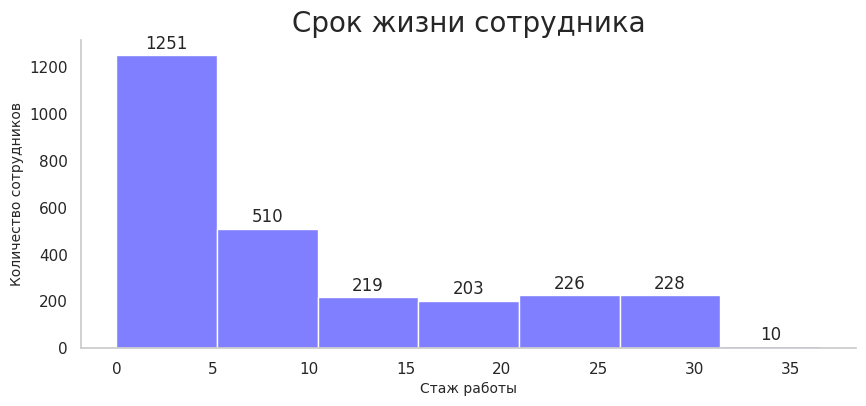

In [84]:
ax = func_graph(df=work_life, x='Стаж_работы', title='Срок жизни сотрудника', xlab='Стаж работы', ylab='Количество сотрудников')

In [85]:
dt = salary[['ИД_мрч',	'ФИО_(как_оформлен,_полное)'	,'Группа по стажу']].drop_duplicates()

Построим график распределения количества сотрудников по стажу в компании

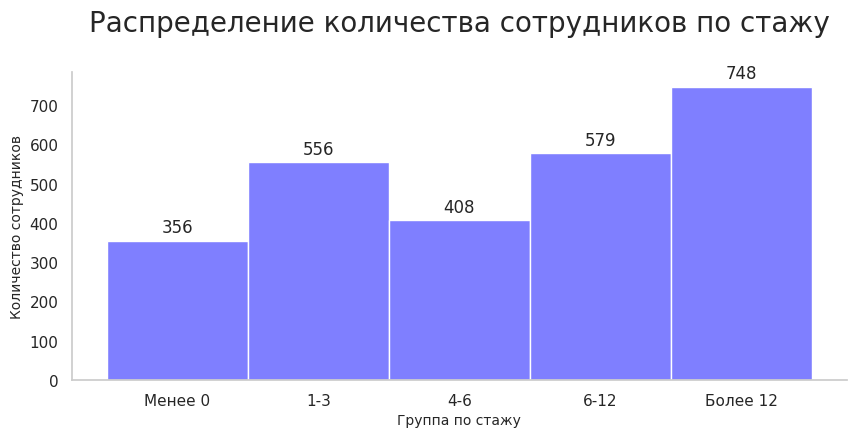

In [86]:
ax = func_graph(df=dt, x='Группа по стажу', title='Распределение количества сотрудников по стажу\n', xlab='Группа по стажу', ylab='Количество сотрудников')

Вычисляем количество сотрудников на каждого РЛ и СВ в каждой групппе по стажу

In [87]:
RL_experience = pd.pivot_table(salary[['месяц', 'ФИО_РЛ', 'Группа по стажу']], index=['месяц', 'ФИО_РЛ'], columns=['Группа по стажу'], aggfunc=len)\
                  .fillna(0).reset_index()

In [88]:
SV_experience = pd.pivot_table(salary[['месяц', 'ФИО_СВ_', 'Группа по стажу']], index=['месяц', 'ФИО_СВ_'], columns=['Группа по стажу'], aggfunc=len)\
                  .fillna(0).reset_index()

Подсчет количества сотрудников у каждого супервайзера ежемесячно с разделением по региону и городу

In [90]:
total_city = salary.groupby(['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион', 'Город'], as_index=False)\
                      .agg({'ФИО_(как_оформлен,_полное)':'count'})\
                      .rename(columns={'ФИО_(как_оформлен,_полное)':'Всего_Город'})

Подсчет количества сотрудников у каждого супервайзера ежемесячно с разделением по региону

In [92]:
total_sv = total_city.groupby(['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион'], as_index=False)\
                     .agg({'Всего_Город':'sum'})\
                     .rename(columns={'Всего_Город':'Всего_СВ'})

Подсчет количества сотрудников у каждого регионального лидера ежемесячно

In [94]:
total_rl = total_sv.groupby(['месяц', 'ФИО_РЛ'], as_index=False)\
                   .agg({'Всего_СВ':'sum'})\
                   .rename(columns={'Всего_СВ':'Всего_РЛ'})

Сводим данные по распределению стажевых групп и количеству сотрудников у каждого РЛ и СВ

In [95]:
RL_with_pers_exp = total_rl.merge(RL_experience, on=['месяц', 'ФИО_РЛ'], how='left')
SV_with_pers_exp = total_sv.merge(SV_experience, on=['месяц', 'ФИО_СВ_'], how='left')

Построение сводной таблицы с возможностью просмотреть количество сотрудников в разрезе города/СВ/РЛ

In [97]:
result = total_city.merge(total_sv, how='left', on=['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион']).merge(total_rl, how='left', on=['месяц', 'ФИО_РЛ'])

In [98]:
salary = salary.sort_values(by='месяц') #сортировка по месяцам

In [99]:
moth = sorted(salary.месяц.unique()) #выносим отдельно уникальные даты

In [100]:
id_users = salary[['месяц', 'ИД_мрч']] #для удобства создаем отдельную таблицу, где используем ID сотрудника и месяца его присутствия в ведомости

1. Выносим отдельно уникальные даты, т.е. месяца зарплатной ведомости
2. Создаем пустой словарь
3. В цикле проходим по датам и заполняем словарь. Ключами в словаре являются даты, значение (используем множество) - уникальные ID сотрудников к этому месяц.

In [101]:
id_users = id_users.sort_values('месяц')
month_name = (id_users.месяц.unique())
id_for_month = dict()
for month in month_name:
    id_for_month[month] = set(id_users[id_users.месяц == month].ИД_мрч.unique())

1. Создаем цикл по словарю с ключом дата и значениями - ID сотрудников
2. Вычитаем множества: из прошлого месяца вычитаем следующий и получаем тех сотрудников, которых нету в следующем месяце, т.е. фактически - уволенных сотрудников
3. Получаем общую таблицу со всеми сотрудниками, которые были уволены в разные месяца

In [102]:
ids = dict()
id_ = []
new_result = pd.DataFrame()
for index in range(len(id_for_month)-1):
    id = pd.DataFrame(id_for_month[month_name[index]].difference(id_for_month[month_name[index+1]]))[0].tolist()
    df = id_users[id_users.месяц == month_name[index]].drop_duplicates()
    df = df.query('ИД_мрч in @id')
    new_result = pd.concat([new_result, df])

In [103]:
new_result = new_result.merge(salary, how='left', on=['месяц', 'ИД_мрч']).drop_duplicates() #склеиваем данные из общей таблицы с полученными данными по уволенным.

Построим график с распредением количества уволенных по стажу работы

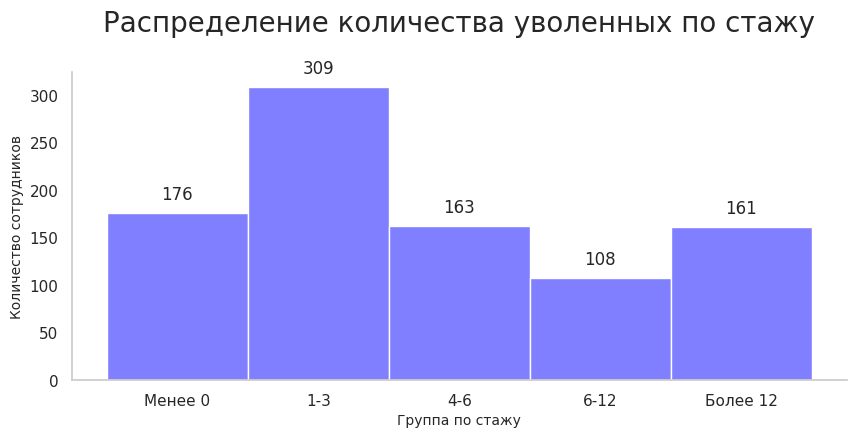

In [104]:
ax = func_graph(df=new_result, x='Группа по стажу', title='Распределение количества уволенных по стажу\n', xlab='Группа по стажу', ylab='Количество сотрудников')

Проводим расчет количество уволенных сотрудников по РЛ и СВ в каждой стажевой группе

In [105]:
RL_exit_experience = pd.pivot_table(new_result[['месяц', 'ФИО_РЛ', 'Группа по стажу']], index=['месяц', 'ФИО_РЛ'], columns=['Группа по стажу'], aggfunc=len)\
                  .fillna(0).reset_index()

In [106]:
SV_exit_experience = pd.pivot_table(new_result[['месяц', 'ФИО_СВ_', 'Группа по стажу']], index=['месяц', 'ФИО_СВ_'], columns=['Группа по стажу'], aggfunc=len)\
                  .fillna(0).reset_index()

In [107]:
dell_personal = new_result #записываем список уволенных сотрудников в новую переменную для последующей записи в лист Excel

Подсчет количества уволенных сотрудников у каждого супервайзера ежемесячно с разделением по региону и городу

In [108]:
total_exit_city = new_result.groupby(['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион', 'Город'], as_index=False)\
                      .agg({'ФИО_(как_оформлен,_полное)':'count'})\
                      .rename(columns={'ФИО_(как_оформлен,_полное)':'Всего_Exit'})

Подсчет количества уволенных сотрудников у каждого супервайзера ежемесячно с разделением по региону

In [109]:
total_exit_sv = total_exit_city.groupby(['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион'], as_index=False)\
                      .agg({'Всего_Exit':'sum'})\
                      .rename(columns={'Всего_Exit':'Всего_Exit_SV'})

Подсчет количества уволенных сотрудников у каждого регионального лидера

In [110]:
total_exit_rl = total_exit_sv.groupby(['месяц', 'ФИО_РЛ'], as_index=False)\
                   .agg({'Всего_Exit_SV':'sum'})\
                   .rename(columns={'Всего_Exit_SV':'Всего_Exit_RL'}) 

Распределяем количество уволенных сотрудников по стажевым группам

In [111]:
RL_with_pers_exp_exit = total_exit_rl.merge(RL_exit_experience, on=['месяц', 'ФИО_РЛ'], how='left')
SV_with_pers_exp_exit = total_exit_sv.merge(SV_exit_experience, on=['месяц', 'ФИО_СВ_'], how='left')

In [112]:
num_of_dis_all = RL_with_pers_exp_exit.groupby(['ФИО_РЛ'], as_index=False)['Всего_Exit_RL',	'Менее 0',	'1-3',	'4-6',	'6-12',	'Более 12'].sum()

Построение таблицы с возможностью просмотреть количество уволенных сотрудников в разрезе города/СВ/РЛ

In [113]:
result_exit = total_exit_city\
              .merge(total_exit_sv, how='left', on=['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион'])\
              .merge(total_exit_rl, how='left', on=['месяц', 'ФИО_РЛ'])

Создаем две сводные таблицы: 
*   total - таблица с отображением данных только по тем городам, где были уволены сотрудники
*   total_all - таблица со всеми данными, где отображены все города вне завимисости от количество уволенных сотрудников



In [114]:
total = result.merge(result_exit, how='right', on=['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион', 'Город'])\
              .sort_values(['месяц', 'ФИО_РЛ'])
total_all = result.merge(result_exit, how='left', on=['месяц', 'ФИО_РЛ', 'ФИО_СВ_', 'Регион', 'Город'])\
              .sort_values(['месяц', 'ФИО_РЛ'])

In [115]:
total_all = total_all.drop(columns=['Всего_СВ', 'Всего_РЛ', 'Всего_Exit_SV', 'Всего_Exit_RL'], axis=1) #удаляем колонки с данными для записи в файл Excel

In [116]:
total['Percent_care_City'] = round(total.Всего_Exit/total.Всего_Город, 2)
total['Percent_care_RL'] = round(total.Всего_Exit_RL/total.Всего_РЛ, 2)

Создаем свод по СВ, где переименовываем колонки, а также расчитываем процент ухода сотрудников у каждого СВ

In [118]:
total_SV = total_all.groupby(['месяц', 'ФИО_РЛ', 'ФИО_СВ_'], as_index=False).agg({'Всего_Exit':'sum', 'Всего_Город':'sum'})\
                    .rename(columns={'Всего_Exit':'Всего_уволенных', 'Всего_Город':'Всего_сотрудников'})
total_SV['Процент уволенных'] = round(total_SV.Всего_уволенных/total_SV.Всего_сотрудников, 2)

In [119]:
total_SV = total_SV.merge(SV_exit_experience, on=['месяц', 'ФИО_СВ_'], how='left')

Создаем свод для РЛ, где переименовываем колонки, а также расчитываем процент ухода сотрудников у каждого РЛ

In [121]:
total_RL = total[['месяц', 'ФИО_РЛ', 'Всего_Exit_RL', 'Всего_РЛ']].drop_duplicates()\
           .rename(columns={'Всего_Exit_RL':'Всего_уволенных', 'Всего_РЛ':'Всего_сотрудников'})
total_RL['Процент уволенных'] = round(total_RL.Всего_уволенных / total_RL.Всего_сотрудников, 2)
total_RL = total_RL.sort_values(by=['ФИО_РЛ', 'месяц'])

In [122]:
total_RL = total_RL.merge(RL_exit_experience, on=['месяц', 'ФИО_РЛ'], how='left')

Найдем общий средний процент текучки за рассматриваемый период времени

In [123]:
percent_dismissed = total_RL.groupby(['месяц'], as_index=False).agg({'Всего_уволенных':'sum', 'Всего_сотрудников':'sum'})
percent_dismissed['Процент текучки'] = percent_dismissed.Всего_уволенных / percent_dismissed.Всего_сотрудников * 100
percent_dismissed['Процент текучки'].mean()

10.674004664139488

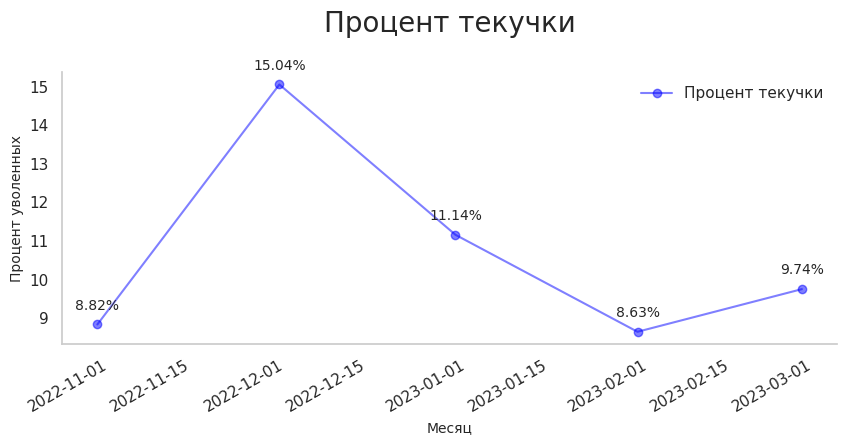

In [124]:
ax = percent_dismissed.plot(x='месяц', y='Процент текучки', color='blue', alpha=0.5, marker='o')
for row, x in enumerate(percent_dismissed['месяц']):
    y = percent_dismissed['Процент текучки'].loc[row]
    plt.text(x, y + 0.5, "{:.2f}%".format(y), fontsize=10, ha = 'center', va = 'center')
plt.title('Процент текучки\n', fontsize=20)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Процент уволенных', fontsize=10)
plt.legend(frameon=False)
sns.despine()
plt.grid(False)
plt.show()

In [125]:
pivot_RL = total_RL[['месяц',	'ФИО_РЛ',	'Всего_уволенных']]

Построим график распределения средней доли уволенных за рассматриваемый период.  
Дропним из данных строку "Диана Полякова 2", т.к. территория новая, функционирует недавно, сотрудников менее 15.

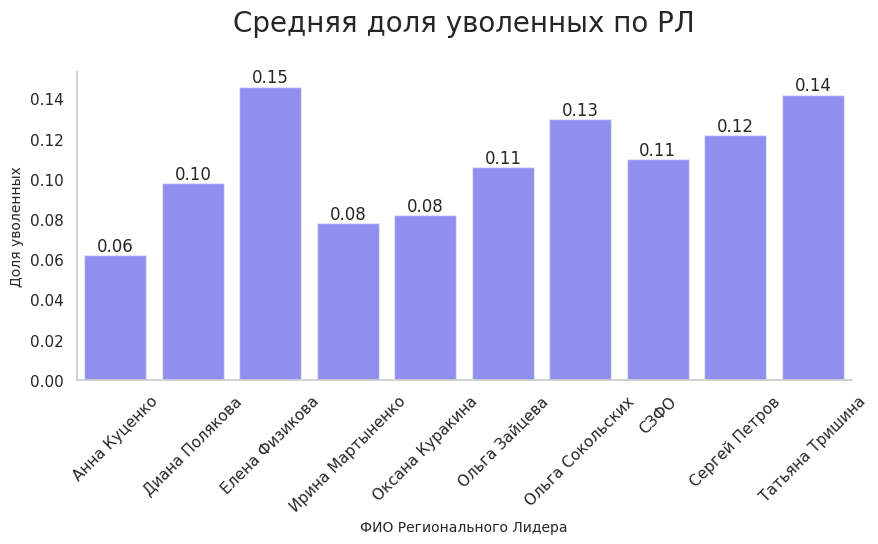

In [126]:
percent_exit = total_RL.groupby(['ФИО_РЛ'], as_index=False).agg({'Процент уволенных':'mean'}).drop(labels = [2],axis = 0)
ax = sns.barplot(data=percent_exit, x='ФИО_РЛ', y='Процент уволенных', color='blue', alpha=0.5)
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
plt.title('Средняя доля уволенных по РЛ\n', fontsize=20)
plt.xlabel('ФИО Регионального Лидера', fontsize=10)
plt.ylabel('Доля уволенных', fontsize=10)
plt.xticks(rotation=45)
sns.despine()
plt.grid(False)
plt.show()

Построим график по среднему распределению количества уволенных в разрезе стажевых групп

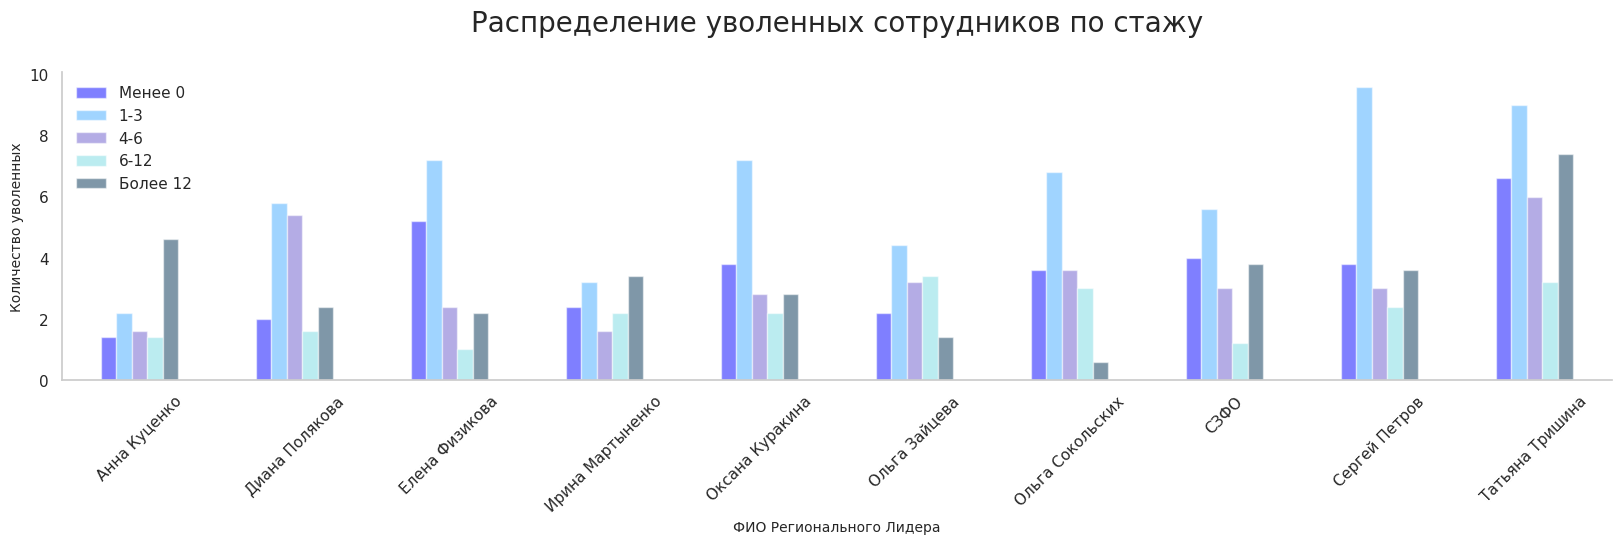

In [127]:
ax = total_RL.groupby(['ФИО_РЛ'], as_index=False)['Менее 0',	'1-3',	'4-6',	'6-12',	'Более 12']\
        .mean().reset_index().drop(labels = [2],axis = 0)\
        .plot(x='ФИО_РЛ', y=['Менее 0',	'1-3',	'4-6',	'6-12',	'Более 12'], kind='bar', figsize=(20, 4)\
        , color={'Менее 0':'#0000FF',	'1-3':'#42AAFF',	'4-6':'#6A5ACD',	'6-12':'#78DBE2',	'Более 12':'#003153'}, alpha=0.5)
ax.grid(False)
plt.xlabel('ФИО Регионального Лидера', fontsize=10)
plt.ylabel('Количество уволенных', fontsize=10)
plt.title('Распределение уволенных сотрудников по стажу\n', fontsize=20)
plt.xticks(rotation=45)
plt.legend(frameon=False)
sns.despine()
plt.show()

Переименовываем необходимые нам столбцы и удаляем те, которые не нужны буду в дальйнешем анализе руководства

In [129]:
total = total.rename(columns={'Всего_Город':'Всего сотрудников в городе', 'Всего_Exit':'Всего уволенных в городе', 'Percent_care_City':'Процент уволенных в городе'})
total = total.drop(columns=['Всего_РЛ', 'Всего_Exit_RL', 'Percent_care_RL', 'ФИО_СВ_', 'Всего_СВ', 'Всего_Exit_SV'], axis=1)

Создаем сводную таблицу с городам, где были хоть раз уволены сотрудники и считаем, сколько месяцев в городе было с увольнениями

In [131]:
city_pivot = pd.pivot_table(total, index=['ФИО_РЛ', 'Регион', 'Город', 'месяц'], values=['Всего сотрудников в городе', 'Всего уволенных в городе', 'Процент уволенных в городе']).fillna(0).reset_index()
count_of_month = city_pivot.groupby(['ФИО_РЛ', 'Регион', 'Город'], as_index=False).agg({'месяц':'count'}).rename(columns={'месяц':'Количество мес. с увол.'})
city_pivot = city_pivot.merge(count_of_month, how='left', on=['ФИО_РЛ', 'Регион', 'Город']).sort_values(['ФИО_РЛ', 'Регион', 'Город', 'Количество мес. с увол.'])

Записываем результат в файл Excel

In [133]:
with pd.ExcelWriter('/content/drive/MyDrive/Work/Exit_RL.xlsx', engine = 'openpyxl') as writer:  
    total_RL.to_excel(writer, sheet_name = 'RL', index = False)
    total_SV.to_excel(writer, sheet_name = 'RL_SV', index = False)
    total_all.to_excel(writer, sheet_name = 'Total_ALL', index = False)
    total.to_excel(writer, sheet_name = 'RL_SV_CITY', index = False)
    dell_personal.to_excel(writer, sheet_name = 'dell_personal', index = False)
    salary.to_excel(writer, sheet_name = 'all_pers', index = False)